In [8]:
import pandas as pd 
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import sys, os
fn_data = "../data/results_storage.parquet"

In [9]:
df_in = pd.read_parquet(fn_data)
df_in

,nuclear,renewable,netStorage,demand,storageLevel,curtailNuclear,curtailRenewable,MAX_STO,share_generation,share_renewable,share_storage,costCurtailNuclear,costCurtailRenewable,date
0,44543.355000,-9.999848e-11,0.000000e+00,44543.3550,1.631449e-09,1.334893e+04,9.999848e-11,22046.349097,1.0,0.00,0.000043,1.0,0,2017-06-01 00:00:00
1,44759.315000,-9.999848e-11,0.000000e+00,44759.3150,1.631425e-09,1.313297e+04,9.999848e-11,22046.349097,1.0,0.00,0.000043,1.0,0,2017-06-01 01:00:00
2,45301.322500,-9.999848e-11,0.000000e+00,45301.3225,1.631404e-09,1.259096e+04,9.999848e-11,22046.349097,1.0,0.00,0.000043,1.0,0,2017-06-01 02:00:00
3,47561.375000,-9.999847e-11,0.000000e+00,47561.3750,1.631191e-09,1.033091e+04,9.999847e-11,22046.349097,1.0,0.00,0.000043,1.0,0,2017-06-01 03:00:00
4,55658.640000,-9.999847e-11,3.637979e-12,55658.6400,1.627191e-09,2.233646e+03,9.999847e-11,22046.349097,1.0,0.00,0.000043,1.0,0,2017-06-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875995,578.922859,1.320354e+04,5.071200e+02,53739.8425,3.995738e+04,-5.131733e-08,1.328290e+04,70014.126359,1.0,0.99,0.000138,1.0,0,2018-05-31 19:00:00
875996,578.922859,1.367085e+04,2.082118e+03,52125.0300,3.787526e+04,-5.131801e-08,1.470830e+04,70014.126359,1.0,0.99,0.000138,1.0,0,2018-05-31 20:00:00
875997,578.922859,1.311392e+04,3.165003e+03,48403.1000,3.471026e+04,-5.131881e-08,1.517026e+04,70014.126359,1.0,0.99,0.000138,1.0,0,2018-05-31 21:00:00
875998,578.922859,1.240366e+04,2.244961e+03,45447.8800,3.246530e+04,-5.131983e-08,1.483856e+04,70014.126359,1.0,0.99,0.000138,1.0,0,2018-05-31 22:00:00


<Axes: xlabel='share_renewable'>

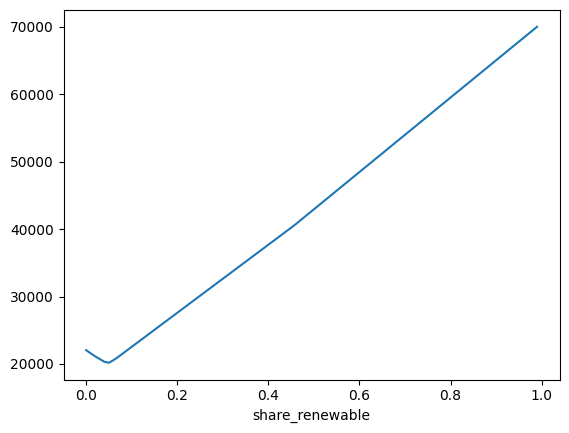

In [10]:
df_in.groupby("share_renewable")["MAX_STO"].mean().plot()

<Axes: xlabel='share_renewable'>

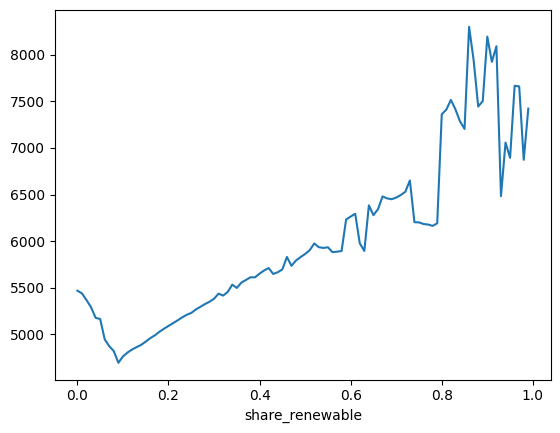

In [11]:
df_in.groupby("share_renewable")["netStorage"].max().plot()

<Axes: xlabel='share_renewable'>

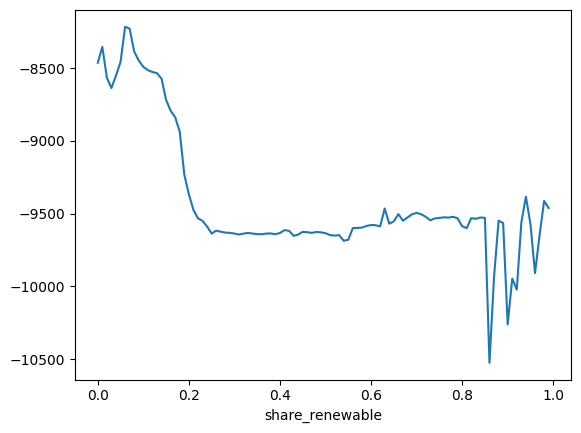

In [12]:
df_in.groupby("share_renewable")["netStorage"].min().plot()

<Axes: xlabel='share_renewable'>

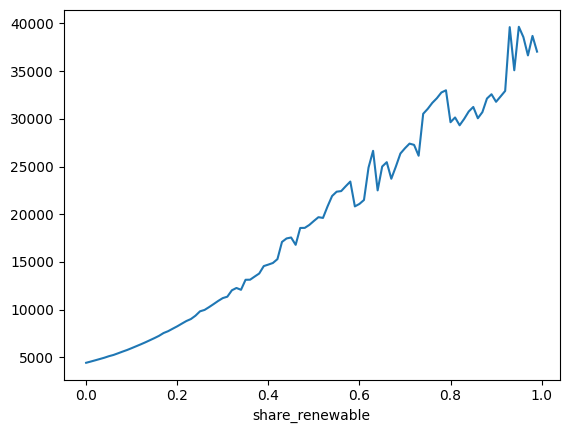

In [13]:
df_in.groupby("share_renewable")["storageLevel"].mean().plot()